## **IQR method-outlier removal method**

In [1]:
from google.colab import files

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
uploaded = files.upload()

Saving weight-height.csv to weight-height (1).csv


In [4]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "weight-height (1).csv" with length 418120 bytes


In [5]:
df=pd.read_csv("weight-height.csv")

In [6]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [7]:
df=df.drop(['Weight'],axis=1)
df.head()

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [8]:
df.describe()

,Height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


In [9]:
df.shape

(10000, 2)

<Axes: >

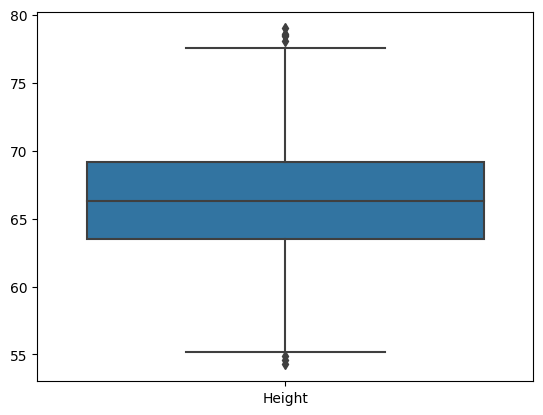

In [10]:
sns.boxplot(df)

In [11]:
Q1 = df.Height.quantile(0.25)
Q3 = df.Height.quantile(0.75)
Q1, Q3

(63.505620481218955, 69.1742617268347)

In [12]:
IQR = Q3 - Q1
IQR

5.668641245615746

In [13]:
ll = Q1 - 1.5*IQR
ul = Q3 + 1.5*IQR
ll,ul

(55.00265861279534, 77.67722359525831)

In [14]:
df[(df.Height<ll)|(df.Height>ul)]

,Gender,Height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
7294,Female,54.873728
9285,Female,54.263133


In [15]:
df1 = df[(df.Height>ll)&(df.Height<ul)]
df1

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243
